In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [156]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732885e-20


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


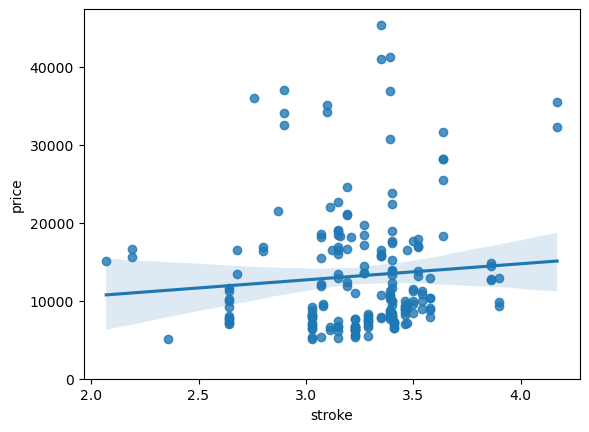

In [157]:
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0,)

df[['stroke', 'price']].corr()

<Axes: xlabel='body-style', ylabel='price'>

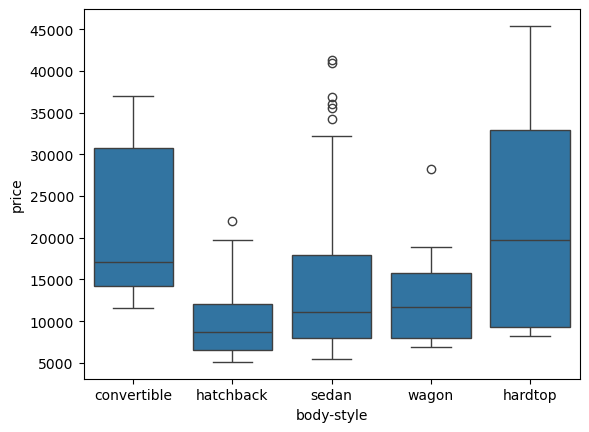

In [158]:
sns.boxplot(x='body-style', y='price', data=df)

In [159]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


### (SLR) Simple Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
x = df[['highway-mpg']]
y = df[['price']]
model = LinearRegression().fit(x, y)

print(f'Intercept: {model.intercept_}')
print(f'Co-efficient: {model.coef_}')

y_pred = model.predict(x)

Intercept: [38423.30585816]
Co-efficient: [[-821.73337832]]


### Using Matplotlib

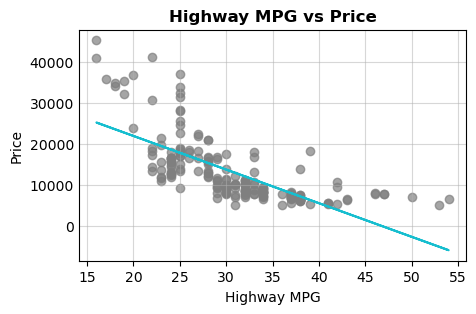

In [161]:
plt.figure(figsize=(5, 3))
plt.title('Highway MPG vs Price', fontweight='bold')
plt.scatter(x, y, color='C7', alpha=0.7)
plt.plot(x, y_pred, color='C9')
plt.grid(True, alpha=0.5)
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.tick_params(axis="y", length=0)

### MLR (Multiple Linear Regression)

In [162]:
new_model = LinearRegression()
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

fit = new_model.fit(z, df['price'])
pred = new_model.predict(z)

print(f'Intercept: {new_model.intercept_}')
print(f'Co-efficient: {new_model.coef_}')

Intercept: -15806.624626329194
Co-efficient: [53.49574423  4.70770099 81.53026382 36.05748882]


### Model Evaluation using Visualization

#### Regression Plot using Seaborn

(0.0, 48163.23928503602)

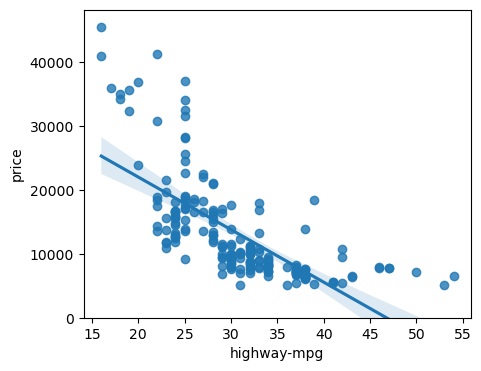

In [163]:
plt.figure(figsize=(5, 4))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

#### Residual Plot

<Axes: xlabel='highway-mpg', ylabel='price'>

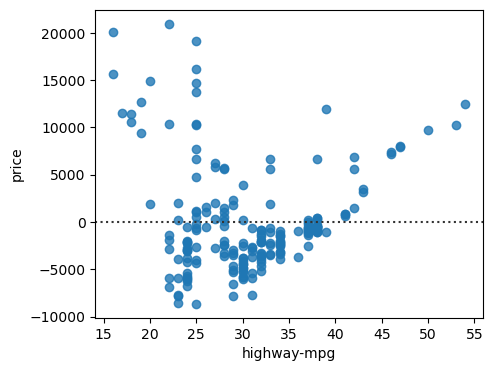

In [164]:
plt.figure(figsize=(5, 4))
sns.residplot(x='highway-mpg', y='price', data=df)

#### Distribution Plot

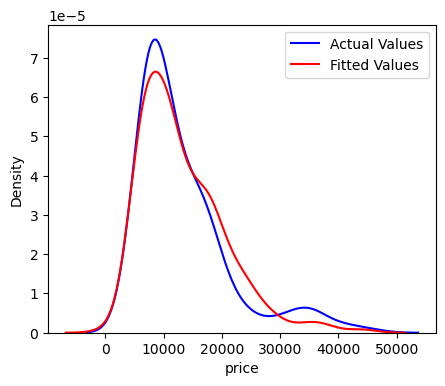

In [165]:

plt.figure(figsize=(5, 4))
sns.kdeplot(df['price'], color='b', label='Actual Values')
sns.kdeplot(pred.flatten(), color='r', label='Fitted Values')
plt.legend()
plt.show()

### Polynomial Regression and Pipelines

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

poly_reg = PolynomialFeatures(degree=2, include_bias=False)

scale = StandardScaler()

scale.fit(df[['horsepower', 'highway-mpg']])

x_scale = scale.transform(df[['horsepower', 'highway-mpg']])

x_scale

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

### Creating Pipelines
- First Step: Series of Transformations
- Last Step: Prediction

##### Import necessary libraries

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

##### Creating Pipeline Constructor

In [168]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('lm', LinearRegression())]

pipe = Pipeline(input)

pipe_fit = pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)
pipe_pred = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

### Measures in In-Sample Eval
- (MSE) Mean-Squared Error
- (R^2 - Co-efficient of Determination) R-Squared

In [169]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(df['price'], y_pred)
r_sqrd = model.score(x, y)

print(f'Co-efficient of Determination: {r_sqrd}')

Co-efficient of Determination: 0.4965911884339176


In [170]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [171]:
x_val = df['highway-mpg']
y_val = df['price']

### Fit

In [172]:
f = np.polyfit(x_val, y_val, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


### Plot

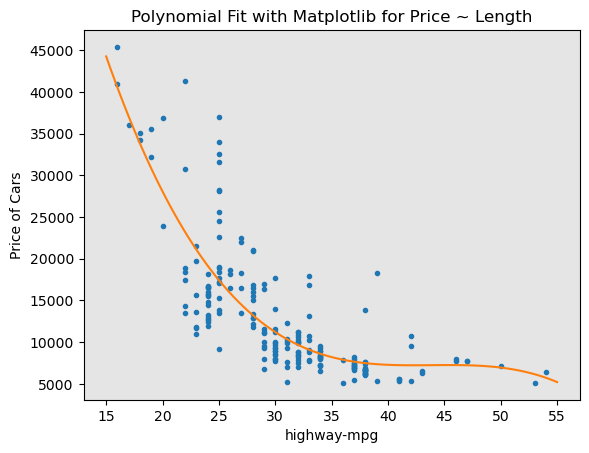

In [173]:
PlotPolly(p, x_val, y_val, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


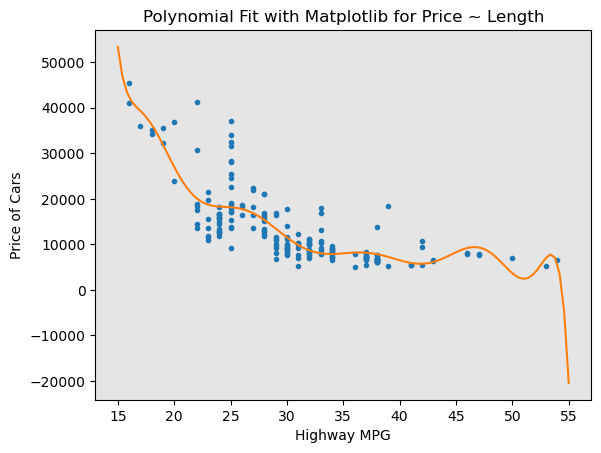

In [174]:
fit = np.polyfit(x_val, y_val, 11)
pol_reg = np.poly1d(fit)
print(pol_reg)

PlotPolly(pol_reg,x_val,y_val, 'Highway MPG')

### Model Evaluation

- In sample evaluation that tells us how well our model will fit the data used to train it.

In [ ]:
from sklearn.model_selection import train_test_split

